# Credit-Card Fraud Detection EDA

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings from matplotlib
warnings.filterwarnings("ignore")

# path to creditcard transactions data
data_path = "creditcard.csv"

In [2]:
# read creditcard data
data = pd.read_csv(data_path)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Description & Info
-----------------------

- **Id:** A unique Id for each row.

- **Time:** Number of seconds elapsed between this transaction and the first transaction in the dataset

- **V1-V28:** Features after dimensionality reduction. These don't have descriptive names to protect user identities and sensitive features

- **Amount:** Transaction amount

- **Class:** Target Class _{0: Genuine, 1: Fraud}_

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
list(data.Class.value_counts(normalize=True) * 100)

[99.82725143693798, 0.1727485630620034]

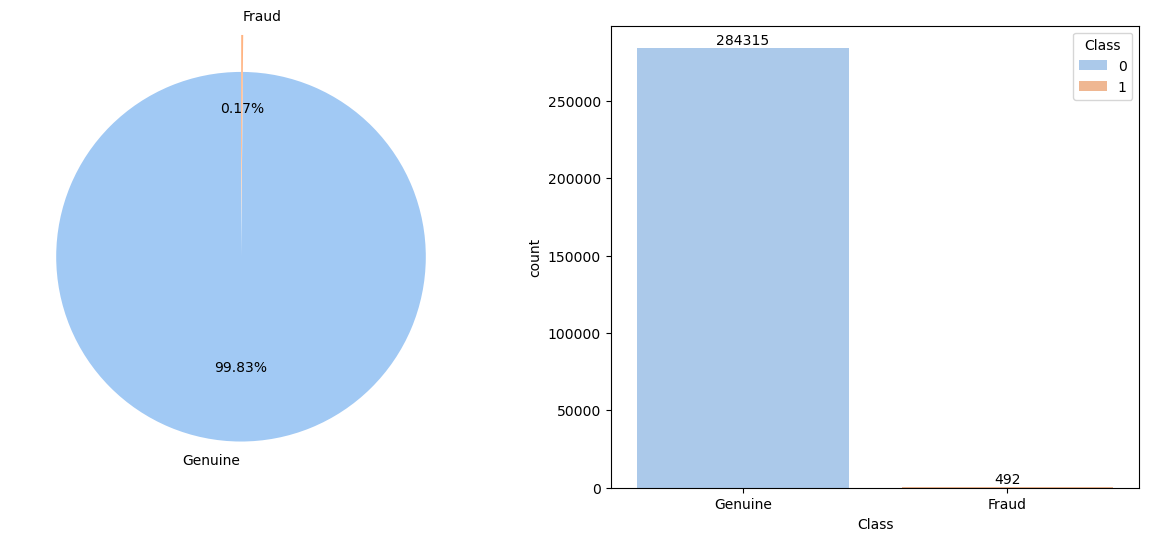

In [84]:
counts_in_pt = list(data.Class.value_counts(normalize=True) * 100)

fig = plt.subplots(1, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(counts_in_pt, labels=["Genuine", "Fraud"], autopct="%1.2f%%", startangle=90, explode=(0, 0.2), colors=sns.color_palette("pastel"))

plt.subplot(1, 2, 2)
ax = sns.countplot(data=data, x="Class", hue="Class", palette=sns.color_palette("pastel"))
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(["Genuine", "Fraud"])

plt.show()

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Observations

- this is a terribly imbalanced dataset -> **99.8 : 0.2**
- there is no null or missing value
- all variables are numeric
- data include 31 columns with over 200k transactions

Heatmap
-------

the simplest tool to start with is the heatmap to visualize the correlation between variables and also relationship between the independent variables and the target variable

this heatmap helps give an overall idea of the relationship between variables and know which to focus on

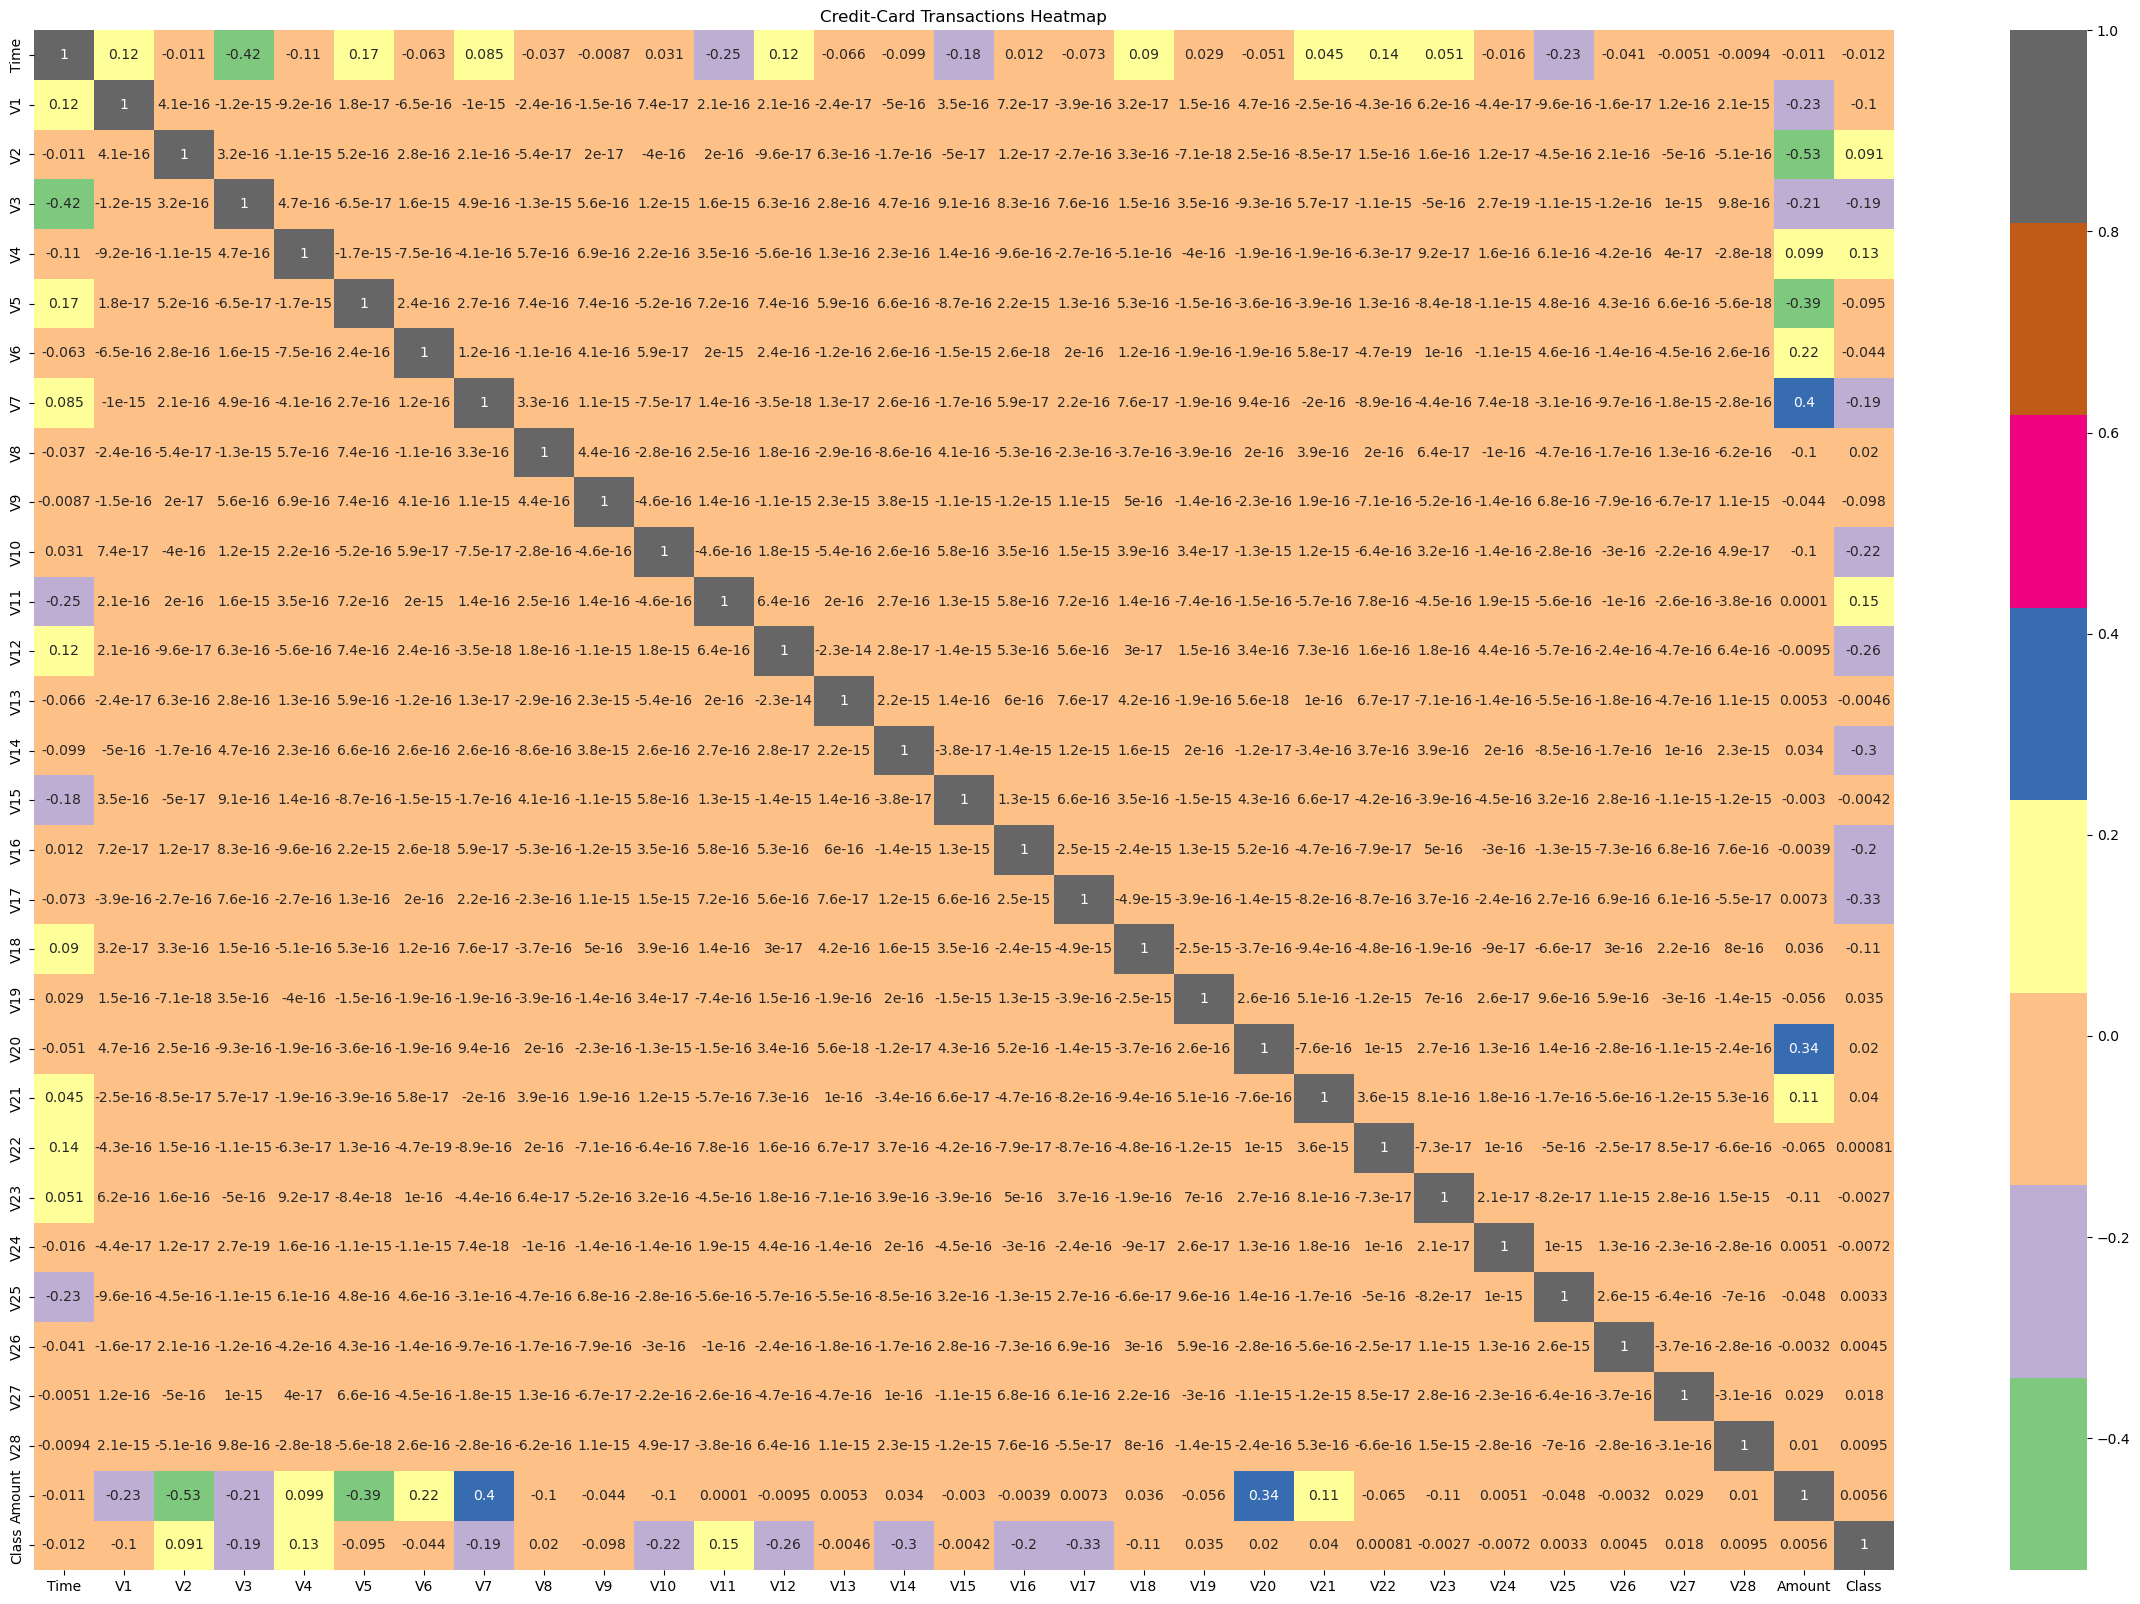

In [14]:
# get correlation between variables
corr = data.corr()

# create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Accent)

# customize heatmap
plt.title("Credit-Card Transactions Heatmap")
plt.show()

##### Observations

- despite poor correlations between our independent variables and the target variable, there are a few variables with relative high correlation to the `Class` variable; these are `V12`, `V14`, `V17`
- these variables will be our focus variables for analysis to observe differences between a genuine and fraudulent transaction

Scatter plot
------------

we go on to visualize relationships between our focus variables and other random variables in our dataset to lookout for any interesting correlation

##### V12

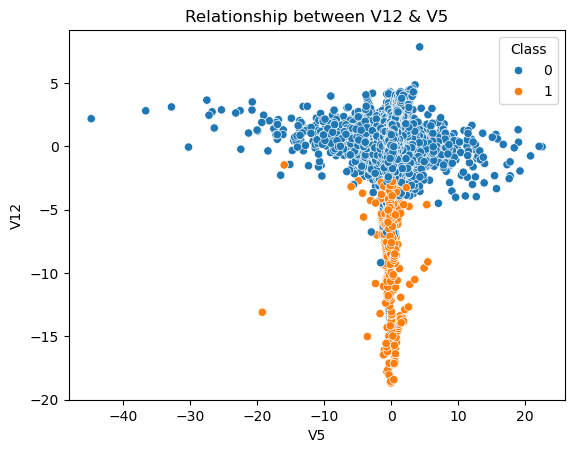

In [22]:
sns.scatterplot(x="V23", y="V12", hue="Class", data=data)

# add labels and title
plt.xlabel("V23")
plt.ylabel("V12")
plt.title("Relationship between V12 & V23")

# display plot
plt.show()

##### V14

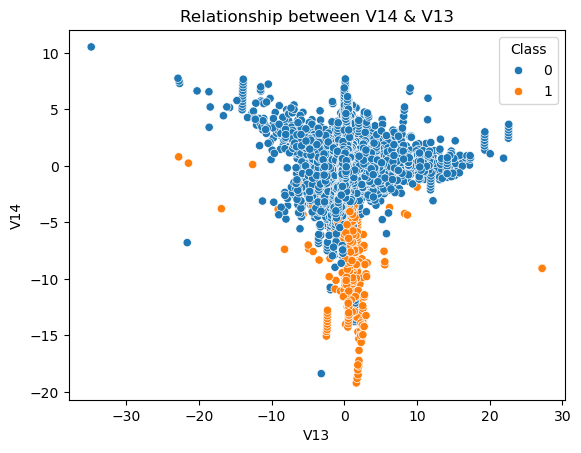

In [17]:
sns.scatterplot(x="V21", y="V14", hue="Class", data=data)

# add labels and title
plt.xlabel("V21")
plt.ylabel("V14")
plt.title("Relationship between V14 & V21")

# display plot
plt.show()

##### V17

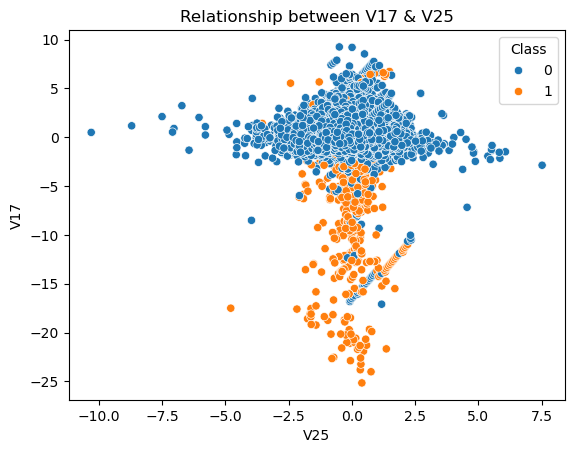

In [85]:
sns.scatterplot(x="V25", y="V17", hue="Class", data=data)

# add labels and title
plt.xlabel("V25")
plt.ylabel("V17")
plt.title("Relationship between V17 & V25")

# display plot
plt.show()

##### Observations

- all three plots have some form of imaginary horizontal line that distinguishes transactions to be genuine or fraudulent
- another interesting observation is that the y-axis (carrying our focus variables) have most fraudulent data points located below the value of -5 and genuine data points are located right above
- on the x-axis where the random variable is, both fraudulent and genuine data points are almost equally distributed on both sides of 0

Pairplot
--------

due to the amount of data and number of columns, generating a pairplot was a challenge

Kernel Density Estimation (KDE) plot
------------------------------------

taking each one of the focus variables to approximate the underlying probability density function for each Class (Frauds | Genuine) using KDE plots, this may give us a clear idea of how fraudulent and genuine transactions are distributed along each variable

##### V17

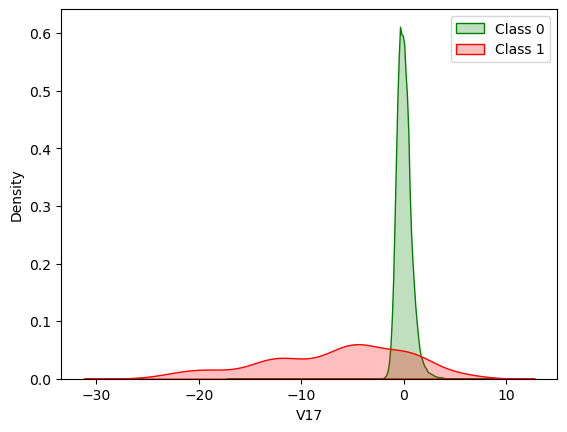

In [31]:
# plot KDE for V17 values that belong to Class 0 (Genuine)
sns.kdeplot(data=data[data["Class"] == 0]["V17"], label="Class 0", fill=True, color="g")

# plot KDE for V17 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data["Class"] == 1]["V17"], label="Class 1", fill=True, color="r")

plt.legend()
plt.show()

##### V14

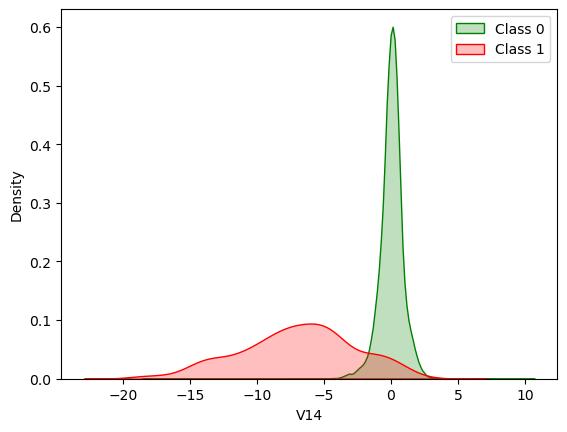

In [32]:
# plot KDE for V14 values that belong to Class 0 (Genuine)
sns.kdeplot(data=data[data["Class"] == 0]["V14"], label="Class 0", fill=True, color="g")

# plot KDE for V14 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data["Class"] == 1]["V14"], label="Class 1", fill=True, color="r")

plt.legend()
plt.show()

##### V12

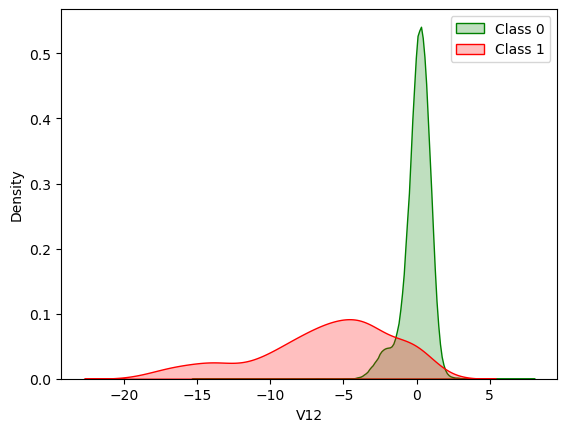

In [33]:
# plot KDE for V12 values that belong to Class 0 (Genuine)
sns.kdeplot(data=data[data["Class"] == 0]["V12"], label="Class 0", fill=True, color="g")

# plot KDE for V12 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data["Class"] == 1]["V12"], label="Class 1", fill=True, color="r")

plt.legend()
plt.show()

##### Another random variable - V28

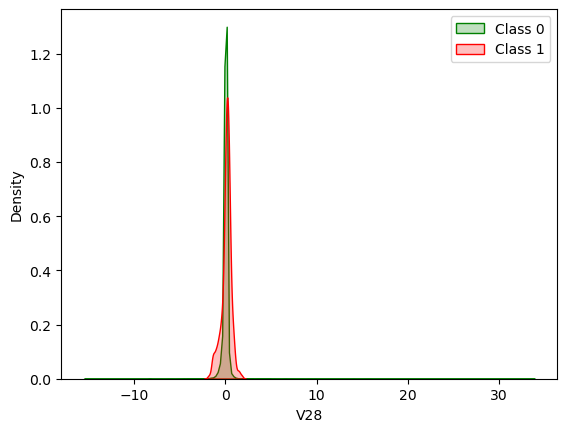

In [41]:
# plot KDE for V28 values that belong to Class 0 (Genuine)
sns.kdeplot(data=data[data["Class"] == 0]["V28"], label="Class 0", fill=True, color="g")

# plot KDE for V28 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data["Class"] == 1]["V28"], label="Class 1", fill=True, color="r")

plt.legend()
plt.show()

##### Observations

- for our focus variables, the distribution of the genuine transactions takes shape very close to a standard normal distribution
- for our focus variables, the bell-shaped curve of the fraudulent transactions indicates a normal distribution
- for the other random variable `V28`, both the genuine and fraudulent transactions have very similar distributions looking like a standard normal distribution

Basic Statistics
----------------

In [43]:
# seperate the genuine and fraudulent transactions
genuine_data = data[data["Class"] == 0]
fraud_data = data[data["Class"] == 1]

##### V14

In [38]:
pd.DataFrame({"Fraud Data": fraud_data["V14"].describe(), "Genuine Data": genuine_data["V14"].describe()})

,Fraud Data,Genuine Data
count,492.000000,284315.000000
mean,-6.971723,0.012064
std,4.278940,0.897007
min,-19.214325,-18.392091
25%,-9.692723,-0.422453
50%,-6.729720,0.051947
75%,-4.282821,0.494104
max,3.442422,10.526766


##### V12

In [39]:
pd.DataFrame({"Fraud Data": fraud_data["V12"].describe(), "Genuine Data": genuine_data["V12"].describe()})

,Fraud Data,Genuine Data
count,492.000000,284315.000000
mean,-6.259393,0.010832
std,4.654458,0.945939
min,-18.683715,-15.144988
25%,-8.688177,-0.402102
50%,-5.502530,0.141679
75%,-2.974088,0.619207
max,1.375941,7.848392


##### V17

In [40]:
pd.DataFrame({"Fraud Data": fraud_data["V17"].describe(), "Genuine Data": genuine_data["V17"].describe()})

,Fraud Data,Genuine Data
count,492.000000,284315.000000
mean,-6.665836,0.011535
std,6.970618,0.749457
min,-25.162799,-17.098444
25%,-11.945057,-0.482644
50%,-5.302949,-0.064833
75%,-1.341940,0.399922
max,6.739384,9.253526


##### Another random variable - V28

In [46]:
pd.DataFrame({"Fraud Data": fraud_data["V28"].describe(), "Genuine Data": genuine_data["V28"].describe()})

,Fraud Data,Genuine Data
count,492.000000,284315.000000
mean,0.075667,-0.000131
std,0.547291,0.329570
min,-1.869290,-15.430084
25%,-0.108868,-0.052950
50%,0.146344,0.011199
75%,0.381152,0.077962
max,1.779364,33.847808


##### Observation

- the mean value of the fraudulent transactions in our focus variables are very alike and vastly different from the mean value of the genuine transactions; the mean value of a random variable in any transaction (fraudulent or genuine) is almost 0
- the standard deviation of fraudulent transactions in our focus variables are also similar to each other just like the standard deviation of genuine transactions also;  however, standard deviation of any other random variable are hardly differentiable using the transaction type
- the values of the mean and standard deviation from these data only affirms our observation from the distribution curves in the KDE above

Conclusion
----------

- by careful exploration of the dataset, we were able to identify the most important independent variables, understanding their relationship with our target variable
- having our focus variables do not outrightly line out the other variables as useless or unimportant, they are still necessary in some sense